In [ ]:
#import EDA tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import evaluation metrics tools
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score, mean_squared_log_error
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_val_score

#import machine learning model and tools
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm, linear_model
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

In [ ]:
#load dataset
ds = pd.read_csv("/content/drive/MyDrive/Persian Artists on Spotify/Spotfiy_Persian_Artists.csv")
ds.head()

,track_id,disc_number,duration_ms,explicit,track_name,track_name_farsi,artist_name,artist_name_farsi,popularity,track_number,album_href,album_id,album_name,album_release_date,album_total_tracks,album_release_year,track_href,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,key_name,mode_name,key_mode
0,31iPeC6I0AiRW8InOxNKzm,1,446880,False,Ghazale Taze,NaN,Salar Aghili,سالار عقیلی,NaN,1,NaN,6GcmAWrnnMb2BuVriPhBLa,Va Eshgh Amad,2020-02-03,NaN,2020,https://api.spotify.com/v1/tracks/31iPeC6I0AiR...,0.437,0.390,0,-7.170,0,0.0299,0.839,0.000035,0.1360,0.330,131.913,3,C,minor,C minor
1,4Fi46ha8teWYTwk0b8fNPi,1,851920,False,Ayeeneye Hosn,NaN,Salar Aghili,سالار عقیلی,NaN,2,NaN,6GcmAWrnnMb2BuVriPhBLa,Va Eshgh Amad,2020-02-03,NaN,2020,https://api.spotify.com/v1/tracks/4Fi46ha8teWY...,0.379,0.146,5,-10.008,1,0.0414,0.970,0.000360,0.0812,0.346,105.634,4,F,major,F major
2,0lQAe6EslKA7CUsS7SCW6Q,1,293160,False,Tarke Eshgh,NaN,Salar Aghili,سالار عقیلی,NaN,3,NaN,6GcmAWrnnMb2BuVriPhBLa,Va Eshgh Amad,2020-02-03,NaN,2020,https://api.spotify.com/v1/tracks/0lQAe6EslKA7...,0.437,0.453,5,-5.392,0,0.0349,0.664,0.002070,0.1100,0.501,94.651,5,F,minor,F minor
3,6dAFmJdVsKk5ksCpGqnKgO,1,648720,False,Moghbacheye Bade Foroosh,NaN,Salar Aghili,سالار عقیلی,NaN,4,NaN,6GcmAWrnnMb2BuVriPhBLa,Va Eshgh Amad,2020-02-03,NaN,2020,https://api.spotify.com/v1/tracks/6dAFmJdVsKk5...,0.488,0.138,2,-12.287,0,0.0451,0.915,0.006580,0.2120,0.445,110.967,5,D,minor,D minor
4,4VSDJGyEdSMB8UL4fDSCvv,1,273480,False,Bigharar,NaN,Salar Aghili,سالار عقیلی,NaN,5,NaN,6GcmAWrnnMb2BuVriPhBLa,Va Eshgh Amad,2020-02-03,NaN,2020,https://api.spotify.com/v1/tracks/4VSDJGyEdSMB...,0.301,0.443,0,-5.702,0,0.0334,0.657,0.000008,0.1200,0.410,148.053,1,C,minor,C minor


## EDA Proccess

In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10632 entries, 0 to 10631
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   track_id            10632 non-null  object 
 1   disc_number         10632 non-null  int64  
 2   duration_ms         10632 non-null  int64  
 3   explicit            10632 non-null  bool   
 4   track_name          10632 non-null  object 
 5   track_name_farsi    612 non-null    object 
 6   artist_name         10632 non-null  object 
 7   artist_name_farsi   10632 non-null  object 
 8   popularity          931 non-null    float64
 9   track_number        10632 non-null  int64  
 10  album_href          931 non-null    object 
 11  album_id            10632 non-null  object 
 12  album_name          10632 non-null  object 
 13  album_release_date  10632 non-null  object 
 14  album_total_tracks  931 non-null    float64
 15  album_release_year  10632 non-null  int64  
 16  trac

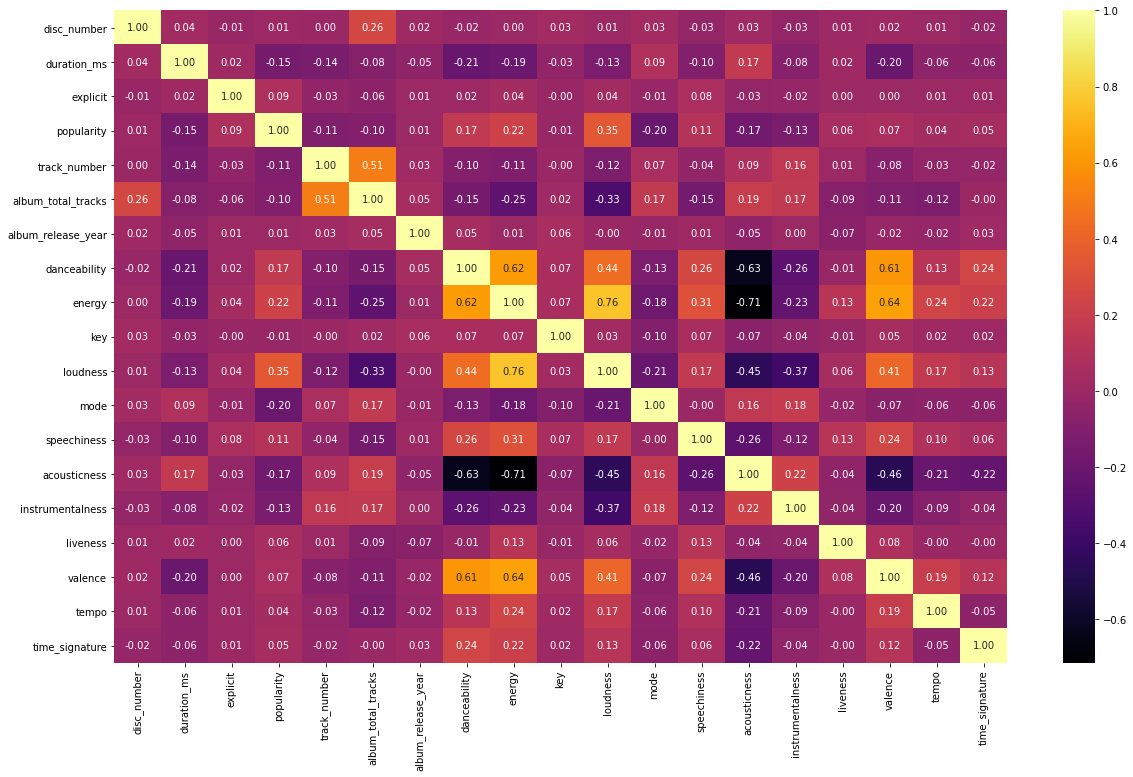

In [ ]:
#correlation matrix

fig = plt.subplots(figsize=(20,12))

sns.heatmap(ds.corr(),
            annot=True,
            fmt="0.2f",
            cmap="inferno");

In [ ]:
#drop some features

drop_f = ["track_name_farsi", "artist_name_farsi", "track_href", "album_href", "album_release_date", "track_id", "album_id","track_name", "key", "key_mode", "popularity","album_total_tracks"]

ds.drop(drop_f, axis=1, inplace=True)
ds.head()

,disc_number,duration_ms,explicit,artist_name,track_number,album_name,album_release_year,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,key_name,mode_name
0,1,446880,False,Salar Aghili,1,Va Eshgh Amad,2020,0.437,0.390,-7.170,0,0.0299,0.839,0.000035,0.1360,0.330,131.913,3,C,minor
1,1,851920,False,Salar Aghili,2,Va Eshgh Amad,2020,0.379,0.146,-10.008,1,0.0414,0.970,0.000360,0.0812,0.346,105.634,4,F,major
2,1,293160,False,Salar Aghili,3,Va Eshgh Amad,2020,0.437,0.453,-5.392,0,0.0349,0.664,0.002070,0.1100,0.501,94.651,5,F,minor
3,1,648720,False,Salar Aghili,4,Va Eshgh Amad,2020,0.488,0.138,-12.287,0,0.0451,0.915,0.006580,0.2120,0.445,110.967,5,D,minor
4,1,273480,False,Salar Aghili,5,Va Eshgh Amad,2020,0.301,0.443,-5.702,0,0.0334,0.657,0.000008,0.1200,0.410,148.053,1,C,minor


### Filling the missing values

In [ ]:
ds.isna().sum()

disc_number             0
duration_ms             0
explicit                0
artist_name             0
track_number            0
album_name              0
album_release_year      0
danceability            0
energy                  0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
time_signature          0
key_name              144
mode_name             144
dtype: int64

In [ ]:
#See what is the common value for mode name
ds["mode_name"].value_counts()

minor    6567
major    3921
Name: mode_name, dtype: int64

In [ ]:
#See what is the common value for key name
ds["key_name"].value_counts()

C     1526
G     1268
A     1208
D     1149
F      935
B      891
E      820
C#     682
A#     633
F#     507
G#     483
D#     386
Name: key_name, dtype: int64

In [ ]:
#filling the missing values
ds["mode_name"].fillna("minor", inplace=True)
ds["key_name"].fillna("C", inplace=True)

In [ ]:
ds.isna().sum()

disc_number           0
duration_ms           0
explicit              0
artist_name           0
track_number          0
album_name            0
album_release_year    0
danceability          0
energy                0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
time_signature        0
key_name              0
mode_name             0
dtype: int64

In [ ]:
#prepare non_nemrics as category list
category = ["explicit", "artist_name", "album_name", "key_name", "mode_name"]

In [ ]:
#split data into X/y

X= ds.drop('tempo', axis=1)
y=ds["tempo"]

X_train, X_test ,y_train ,y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [ ]:
#Turn the Non-numerics features to number
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                  one_hot,
                                  category)],
                                remainder = "passthrough")
transformed_X = transformer.fit_transform (X)
transformed_X

<10632x2196 sparse matrix of type '<class 'numpy.float64'>'
	with 192467 stored elements in Compressed Sparse Row format>

In [ ]:
dummies = pd.get_dummies(ds[category])
dummies

,explicit,artist_name_Abbas Ghaderi,artist_name_Abdolhosein Mokhtabad,artist_name_Afshin Moghaddam,artist_name_Ali Lohrasbi,artist_name_Ali Zand Vakili,artist_name_Alireza Assar,artist_name_Alireza Eftekhari,artist_name_Alireza Ghorbani,artist_name_Amir Tataloo,artist_name_Amirabbas Golab,artist_name_Babak Jahanbakhsh,artist_name_Benyamin Bahadori,artist_name_Dang Show,artist_name_Dariush,artist_name_Ebrahim Monsefi,artist_name_Ehsan Khajeh Amiri,artist_name_Faramarz Aslani,artist_name_Faramarz Assef,artist_name_Farhad Mehrad,artist_name_Farman Fathalian,artist_name_Farzad Farzin,artist_name_Hamed Homayoun,artist_name_Hamid Askari,artist_name_Hamid Hami,artist_name_Hassan Shamaizadeh,artist_name_Hatam Asgari,artist_name_Hesameddin Seraj,artist_name_Hichkas,artist_name_Homayoun Shajarian,artist_name_Hossein Alizadeh,artist_name_Iraj Bastami,artist_name_Javad Yassari,artist_name_Kaveh Deylami,artist_name_Kayhan Kalhor,artist_name_Kourosh Yaghmaei,artist_name_Koveyti Poor,artist_name_Macan Band,artist_name_Majid Akhshabi,artist_name_Mazyar Fallahi,...,album_name_Zendegi (Remix),album_name_Zendegi Edame Dare,album_name_Zendegi Kon,album_name_Zendegie Hame Hamine,album_name_Zendegie Hame Hamine (Remix),album_name_Zendegimo Vasat Midam,album_name_Zendehbahd Eshgh,album_name_Zendooni,"album_name_Zendooni, Dariush 5 - Persian Music",album_name_Ziadi,album_name_Ziafat - Persian Music,album_name_Zibatarin,album_name_Zibatarin Etefagh,album_name_Zibaye Bitab,album_name_Zibaye Lanati,album_name_Zire Baroon,album_name_Zire Hamkaf,album_name_Zire Saghfe Tehroon,album_name_Zohoor,album_name_Zolf Bar Bad Bede,album_name_Zood Barmigardam,album_name_Zood Gozasht,album_name_Zoraghe Mahtab,album_name_شراب چشمان,album_name_َAsheghet Manam (Hamid Shekari Remix),album_name_یاد آر,key_name_A,key_name_A#,key_name_B,key_name_C,key_name_C#,key_name_D,key_name_D#,key_name_E,key_name_F,key_name_F#,key_name_G,key_name_G#,mode_name_major,mode_name_minor
0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10627,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
10628,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
10629,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
10630,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0


In [ ]:
#new split data into X/y

X= ds.drop('tempo', axis=1)
y=ds["tempo"]

X_train, X_test ,y_train ,y_test = train_test_split(transformed_X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state = 7)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 250 , random_state = 42 )
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_pred

array([119.554516, 117.212168, 117.014408, ..., 123.581248, 123.551612,
       133.171268])

In [ ]:
def show_scores(model):
  train_pred=model.predict(X_train)
  test_pred=model.predict(X_test)

  scores={"Training R2":r2_score(y_train,train_pred),
          "Test R2":r2_score(y_test,test_pred),
          "Training MAE":mean_absolute_error(y_train,train_pred),
          "Test MAE":mean_absolute_error(y_test,test_pred),
          "Training MSE":mean_squared_error(y_train,train_pred),
          "Test MSE":mean_squared_error(y_test,test_pred)}

  return scores

In [ ]:
show_scores(regressor)

{'Test MAE': 18.610056170694254,
 'Test MSE': 634.2991214593375,
 'Test R2': 0.29411463693242346,
 'Training MAE': 6.706564470384743,
 'Training MSE': 85.09856361299384,
 'Training R2': 0.9041304782196448}

In [ ]:
ds["artist_name"].value_counts()

Mohammadreza Shajarian    554
Hossein Alizadeh          545
Reza Sadeghi              507
Dariush                   465
Alireza Eftekhari         439
                         ... 
Nasser Abdollahi           22
Mohammad Golriz            17
Ebrahim Monsefi            16
Farman Fathalian           10
Koveyti Poor                9
Name: artist_name, Length: 69, dtype: int64